# Predicting Potential Customers For an Insurance Policy - CoIL 2000 Challenge
## Preparation of data and exploretory data analysis

The data set is provided in the text format and has 5822 rows and 86 columns. The column names and their descriptions are given 
in a different text file. So, first of all we create a list of column names by reading through the 'TicDataDescr.txt' file
and then import the main data file 'ticdata2000.txt' as a DafaFrame with column names assigned by using the list created.

In [32]:
features_list = [] # read the feature description txt. file and make a list of feature names
fh = open('TicDataDescr.txt', 'r')
for i, line in enumerate(fh):
    if 32 < i < 51: # 204:
        features_list.append(line.rstrip('\n')[2:])
    elif 51 <= i< 204:
        features_list.append(line.rstrip('\n')[3:])
fh.close()

while '' in features_list:
    features_list.remove('')

print(features_list)
len(features_list)

['MOSTYPE Customer Subtype see L0', 'MAANTHUI Number of houses 1 – 10', 'MGEMOMV Avg size household 1 – 6', 'MGEMLEEF Avg age see L1', 'MOSHOOFD Customer main type see L2', 'MGODRK Roman catholic see L3', 'MGODPR Protestant ...', 'MGODOV Other religion', 'MGODGE No religion', 'MRELGE Married', 'MRELSA Living together', 'MRELOV Other relation', 'MFALLEEN Singles', 'MFGEKIND Household without children', 'MFWEKIND Household with children', 'MOPLHOOG High level education', 'MOPLMIDD Medium level education', 'MOPLLAAG Lower level education', 'MBERHOOG High status', 'MBERZELF Entrepreneur', 'MBERBOER Farmer', 'MBERMIDD Middle management', 'MBERARBG Skilled labourers', 'MBERARBO Unskilled labourers', 'MSKA Social class A', 'MSKB1 Social class B1', 'MSKB2 Social class B2', 'MSKC Social class C', 'MSKD Social class D', 'MHHUUR Rented house', 'MHKOOP Home owners', 'MAUT1 1 car', 'MAUT2 2 cars', 'MAUT0 No car', 'MZFONDS National Health Service', 'MZPART Private health insurance', 'MINKM30 Income 

86

Now import the data as a DataFrame and assign the feature names from the list prepared above

In [132]:
import pandas as pd
df = pd.read_table('ticdata2000.txt', names=features_list) # assign the feature names from the list prepared before

In [133]:

df.head()

,MOSTYPE Customer Subtype see L0,MAANTHUI Number of houses 1 – 10,MGEMOMV Avg size household 1 – 6,MGEMLEEF Avg age see L1,MOSHOOFD Customer main type see L2,MGODRK Roman catholic see L3,MGODPR Protestant ...,MGODOV Other religion,MGODGE No religion,MRELGE Married,...,APERSONG Number of private accident insurance policies,AGEZONG Number of family accidents insurance policies,AWAOREG Number of disability insurance policies,ABRAND Number of fire policies,AZEILPL Number of surfboard policies,APLEZIER Number of boat policies,AFIETS Number of bicycle policies,AINBOED Number of property insurance policies,ABYSTAND Number of social security insurance policies,CARAVAN Number of mobile home policies 0 - 1
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


Check missing values, constant columns and duplicate columns

In [134]:
# check for missing values
df.isnull().values.any() # gives 'False' - meaning there is no missing value
# find the constant columns
cols_to_remove = []
for col in df.columns:
    if df[col].std() == 0: 
        cols_to_remove.append(col)
print(cols_to_remove) # no column with constant elements was found

#remove duplicate columns
#print(df.shape)
df1 = df.T.drop_duplicates().T
print(df1.shape) #- no duplicate columns found

[]
(5822, 86)


The data doesn't have any constant column, duplicate column or a column with any null element. 

In [135]:
#df.info()
ls = list(df1['CARAVAN Number of mobile home policies 0 - 1'].values)
se = set(ls)
print(se, len(ls)) # there are 5822 entries in the target column and each entry is either 0 or 1

{0, 1} 5822


There are 5822 entries in the target column and each entry is either 1 (policy holder) or 0 (non-holder). Now we calculate
what percentage of the total customers are life insurence policy holders.

In [137]:
#print(ls.count(1), ls.count(0)) # no. of policy holders, non holders
num_policy_users = ls.count(1)
num_nonusers = ls.count(0)
users_perc = num_policy_users*100/(num_policy_users+num_nonusers)
print(users_perc)

5.977327378907592


 
Only about 6% of the total customers hold the insurence policy. I would like to answer the following questions-

 a) what are the most important features?
 
 b) How the values of most important features are related to the target?

 


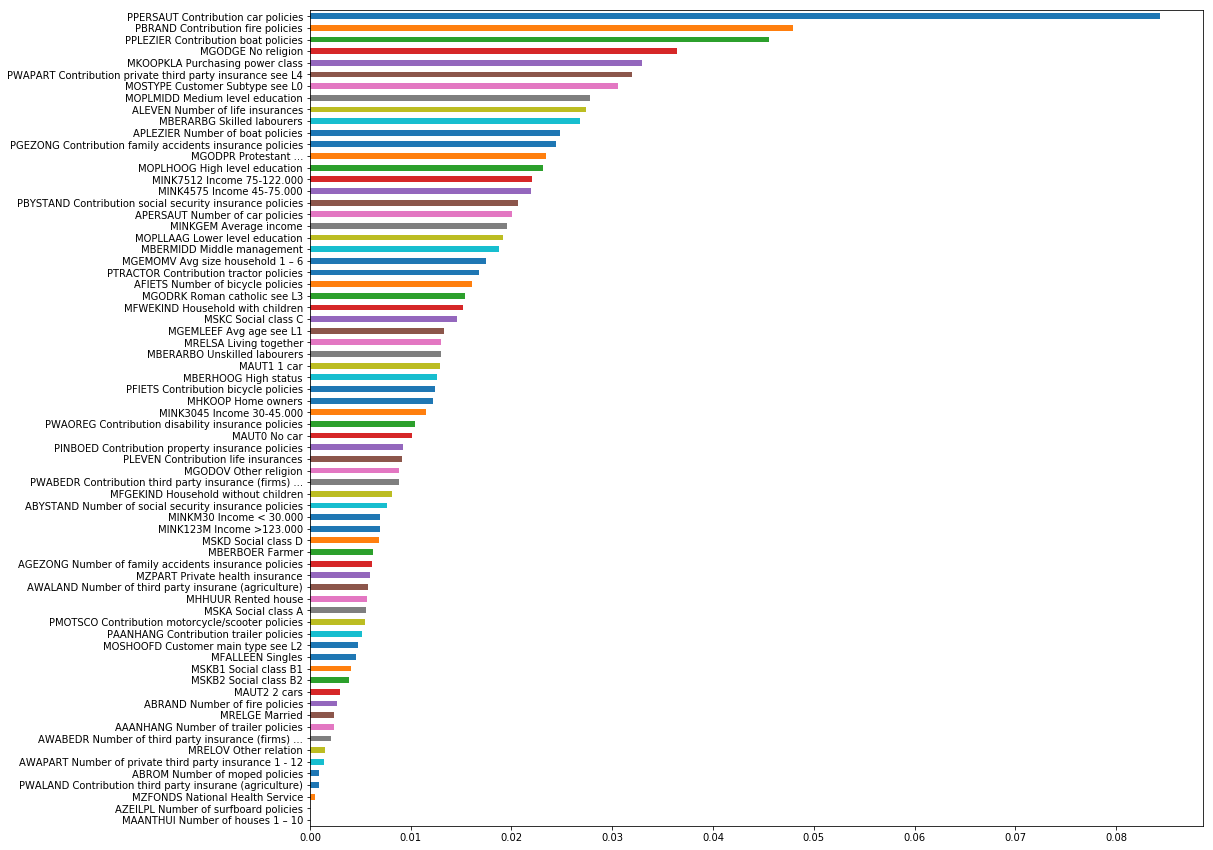

In [138]:
# a) feature selection by gradientboost - 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
X = df1.drop('CARAVAN Number of mobile home policies 0 - 1',axis = 1)
y = df1['CARAVAN Number of mobile home policies 0 - 1']
gb = GradientBoostingRegressor(random_state = 42) 
gb.fit(X, y)

feat_importances = pd.Series(gb.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(70)
imp_features = feat_importances.index.values
plt.figure(figsize=(16,15))
feat_importances.plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

Let's study in more datail about the three most important features - 'PPERSAUT Contribution car policies',
'PBRAND Contribution fire policies' and 'PPLEZIER Contribution boat policies'.

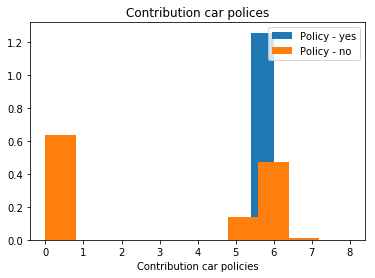

In [139]:
#b) histograms
%matplotlib inline
df_2 =df1[['PPERSAUT Contribution car policies',  'PBRAND Contribution fire policies', 'PPLEZIER Contribution boat policies', 
           'CARAVAN Number of mobile home policies 0 - 1']]
df_2.head()
df_yes = df_2.loc[df_2['CARAVAN Number of mobile home policies 0 - 1']==1] # policy holders only
df_no = df_2.loc[df_2['CARAVAN Number of mobile home policies 0 - 1']==0] # non holders only
lis1_yes = df_yes['PPERSAUT Contribution car policies']
lis2_yes = df_yes['PBRAND Contribution fire policies']
lis3_yes = df_yes['PPLEZIER Contribution boat policies']
lis1_no = df_no['PPERSAUT Contribution car policies']
lis2_no = df_no['PBRAND Contribution fire policies']
lis3_no = df_no['PPLEZIER Contribution boat policies']
plt.hist(lis1_yes,10, density = True, label = 'Policy - yes')
plt.hist(lis1_no, 10, density = True, label = 'Policy - no')
plt.xlabel('Contribution car policies')
plt.legend(loc='upper right')
plt.title('Contribution car polices')
plt.show()

The above histogram shows that, majority of the policy holders have 6 car insurance policies

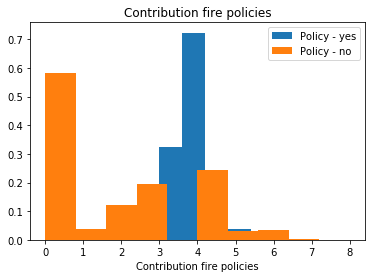

In [140]:
plt.hist(lis2_yes,10, density = True, label = 'Policy - yes')
plt.hist(lis2_no, 10, density = True, label = 'Policy - no')
plt.xlabel('Contribution fire policies')
plt.legend(loc='upper right')
plt.title('Contribution fire policies')
plt.show()

The histogram shows that the majority of insurence policy holders have 4 or 3 contribution fire policies.

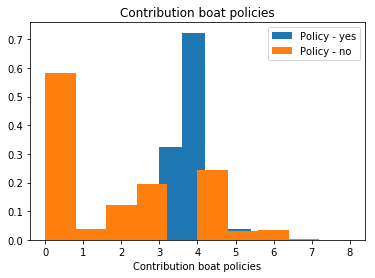

In [141]:
plt.hist(lis2_yes,10, density = True, label = 'Policy - yes')
plt.hist(lis2_no, 10, density = True, label = 'Policy - no')
plt.xlabel('Contribution boat policies')
plt.legend(loc='upper right')
plt.title('Contribution boat policies')
plt.show()

The histogram shows that the majority of insurence policy holders have 3 or 4 boat policies.

In [ ]:
# shows that only 68 features contribute, other features are not important. 

In [ ]:
# Modeling - Logistic Regression
#X = df.drop(' CARAVAN Number of mobile home policies 0 - 1',axis = 1) #feature
#y = df[' CARAVAN Number of mobile home policies 0 - 1'] #target
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#logreg = LogisticRegression() # instantiate the model
#logreg.fit(X_train,y_train) # fit the data
#y_pred=logreg.predict(X_test)


In [41]:
# Model evaluation by confusion matrix
#from sklearn import metrics
#cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#cnf_matrix

In [42]:
# Visualize the confusion matrix by using a heatmap
#%matplotlib inline
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

#sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
#plt.tight_layout()
#plt.title('Confusion matrix')
#plt.ylabel('Actual label')
#plt.xlabel('Predicted label')

In [43]:
# model evaluation by accuracy, precission and Recall
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))
#print("Recall:",metrics.recall_score(y_test, y_pred))

In [44]:
# accuracy = tp+tn+fp+fn /tp+tn (tn, fp, fn, tp)
# precision = tp/tp+fp - if predicted to be positive, what is the prob that it is true?
# recall = tp/tp+fn -  out of total positive cases, how many are predicted as positive? also known
# as true positive rate. Look for true negative rate too.
#a b// c, d sencitivity = d/c+d,  tp/tp+fn , specificity = a/a+b, tn/tn+fp

In [45]:
#from sklearn.metrics import roc_curve
#y_pred_prob = logreg.predict_proba(X_test)[:,1]
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
#plt.plot(fpr, tpr, label='Logistic Regression')
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlabel('False positive rate')
#plt.ylabel('True positive rate')
#plt.title('Logistic regression roc curve')

In [ ]:
## the area under the roc curve gives the quality of a model, greater the area better the quality. Plot the roc area from 
# different models and the model with the highest area under it is the best.